### logistic线性回归  
使用梯度上升法

In [1]:
from numpy import *
# 定义一个函数来进行加载数据
def loadDataSet():
    dataMat = []
    labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

In [2]:
# 进行sigmoid函数处理
def sigmoid(intX):
    return 1.0/(1+exp(-intX))

In [3]:
# 梯度上升算法
def gradAscent(dataMatIn,classLabels):
    # 使用numpy矩阵
    dataMatrix = mat(dataMatIn)
    labelMat = mat(classLabels).transpose()
    m,n = shape(dataMatrix)
    # 目标移动步长
    alpha = 0.001
    # 迭代次数
    maxCycles = 500
    weights = ones((n,1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix*weights)
        error = (labelMat-h)
        weights = weights + alpha*dataMatrix.transpose()*error
    return weights

In [4]:
# 实际运行
dataArr,labelMat = loadDataSet()
gradAscent(dataArr,labelMat)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

In [5]:
import matplotlib.pyplot as plt
def plotBestFit(weights):
    dataMat,labelMat = loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
    plt.close('all')
    fig = plt.figure(1)
    ax = fig.add_subplot(111)
    # s 是标量或者形如shape(n，)数组，可选，默认:20
    ax.scatter(xcord1,ycord1,s=30,c='red',marker = 's')
    ax.scatter(xcord2,ycord2,s=30,c='green')
    
    x = arange(-3.0,3.0,0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x,y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

In [6]:
weights = gradAscent(dataArr,labelMat)

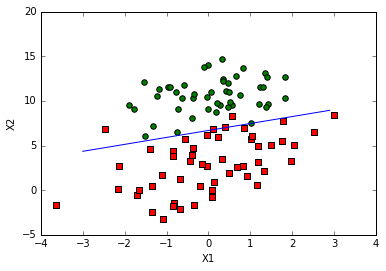

In [7]:
plotBestFit(weights.getA())

In [8]:
# 随机梯度上升算法
def stocGradAscent0(dataMatrix,classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i]-h
        weights = weights + alpha*error*dataMatrix[i]
    return weights

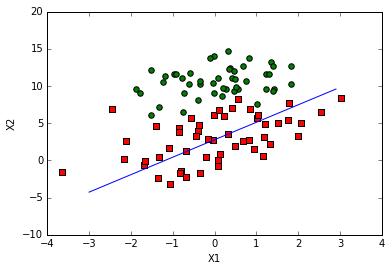

In [9]:
dataArr,labelMat = loadDataSet()
weights = stocGradAscent0(array(dataArr),labelMat)
plotBestFit(weights)

从上图中，可以看到拟合的效果没有之前的那个好，分类器错过了三份之一的样本

但是两个程序有区别
第一个程序是在整个数据集上迭代了500次才得到的。

In [10]:
# 改进的随机梯度上升算法
def stocGradAscent1(dataMatrix,classLabels,numIter=150):
    m,n = shape(dataMatrix)
    weights = ones(n)
    # 迭代
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4/(1.0+i+j) + 0.01
            randIndex = int(random.uniform(0,len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha*error*dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

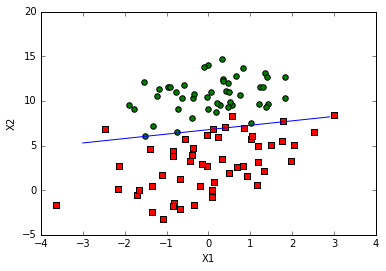

In [11]:
dataArr,labelMat = loadDataSet()
weights = stocGradAscent1(array(dataArr),labelMat)
plotBestFit(weights)

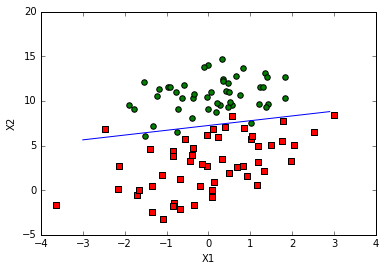

In [12]:
weights = stocGradAscent1(array(dataArr),labelMat,500)
plotBestFit(weights)

In [13]:
# 预测病马死亡率
def classifyVector(intX,weights):
    prob = sigmoid(sum(intX*weights))
    if prod>0.5:
        return 1.0
    else:
        return 0.0

In [17]:
def colicTest():
    frTrain = open('horseColicTraining.txt')
    frTest = open('horseColicTest.txt')
    trainingSet =[]
    trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(array(trainingSet),trainingLabels,500)
    errorCount = 0.0
    numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec +=1.0
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr),trainWeights)) != int(currLine[21]):
            errorCount+=1
    errorRate = (float(errorCount)/numTestVec)
    print 'the error rate of this test is %f' % errorRate
    return errorRate

In [18]:
def multiTest():
    numTest = 10
    errorSum = 0.0
    for k in range(numTest):
        errorSum += colicTest()
    print 'after %d iterations the average error rate is %f ' % (numTest,errorSum/float(numTest))
    

In [19]:
multiTest()

e:\python27\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


the error rate of this test is 0.298507
the error rate of this test is 0.298507
the error rate of this test is 0.298507
the error rate of this test is 0.298507
the error rate of this test is 0.298507
the error rate of this test is 0.298507
the error rate of this test is 0.298507
the error rate of this test is 0.298507
the error rate of this test is 0.298507
the error rate of this test is 0.298507
after 10 iterations the average error rate is 0.298507 
